In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import imutils
from scanner import show_images

from sklearn.svm import  SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


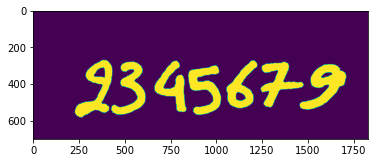

In [3]:
img = cv2.imread('datasets/digits/1.jpg')[1000:1700,570:2400]
vis_img = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
_,thresh =  cv2.threshold(blur, 150, 255,cv2.THRESH_BINARY_INV)
print(thresh)

plt.imshow(thresh)

[[847, 300, 180, 269], [1457, 294, 254, 247], [1244, 281, 235, 247], [427, 280, 188, 288], [664, 274, 174, 279], [1056, 273, 169, 260], [229, 271, 205, 312]]


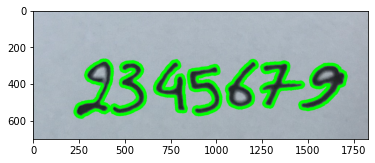

In [4]:
# find contours in the thresholded image, then initialize the
# digit contours lists
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digit_bb = []
# loop over the digit area candidates
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# if the contour is sufficiently large, it must be a digit
	if w >= 50 and (h >= 100 and h <= 800):
		digit_bb.append([x, y, w, h])
		cv2.drawContours(vis_img, [c], -1, (0, 255, 0), 15)

print(digit_bb)
plt.imshow(vis_img)

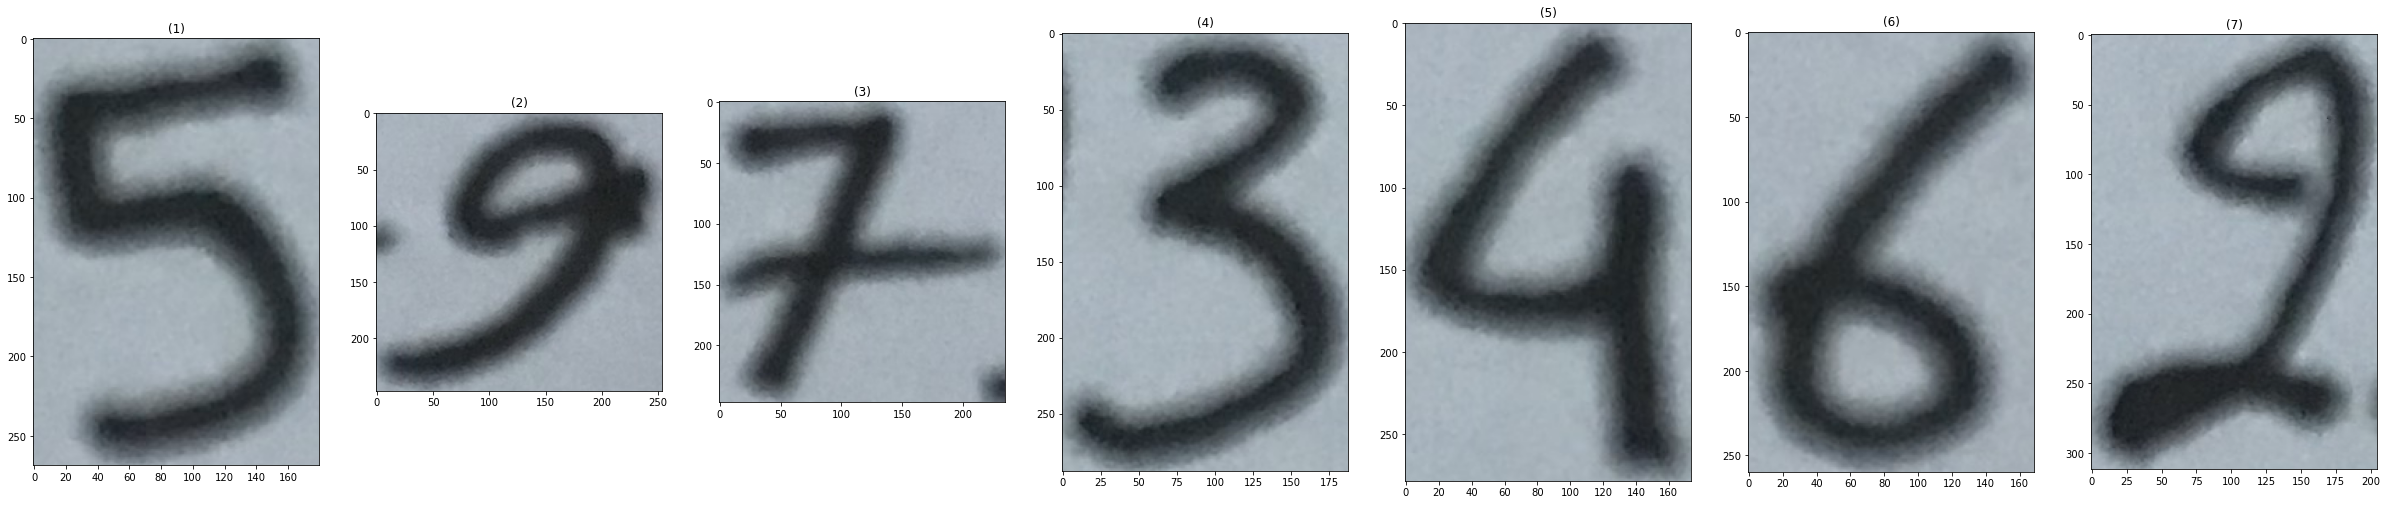

In [5]:
digits = []
for bb in digit_bb:
    x,y,w,h = bb
    digits.append(img[y:y+h,x:x+w])

show_images(digits,0)

In [6]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

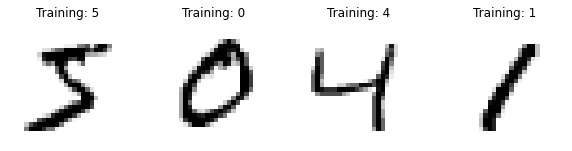

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
X_sampled, _, y_sampled, _ = train_test_split(X,y,test_size=0.5, random_state=30, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled,test_size=0.2, random_state=30)

In [9]:
X_train.shape

(28000, 784)

In [10]:
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps)

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [11]:
grid.fit(X_train, y_train)
print( "score = {3.2f}".format((grid.score(X_test, y_test))))
print( "best parameters from train data: ", grid.best_params_)

In [ ]:
for digit in digits:
    resized_image = cv2.resize(digit, (28, 28))
    print(np.argmax(grid.predict(digit)),end='')